<a href="https://colab.research.google.com/github/ChiaraData/ChiaraMasi/blob/main/projetaccident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# projet Data Science: Analyse des accidents de la route en France

## Introduction

La sécurité routière demeure une préoccupation majeure en France. En 2023, 3 398 personnes ont perdu la vie sur les routes françaises, soit une diminution de 4,3 % par rapport à 2022 et de 2,9 % par rapport à 2019, année de référence avant la pandémie de COVID-19.

Cette analyse vise à explorer les données des accidents de la route en France, en mettant en lumière les tendances récentes, les facteurs contributifs et les populations les plus touchées. Comprendre ces éléments est essentiel pour élaborer des stratégies efficaces de prévention et améliorer la sécurité de tous les usagers de la route.

## Objectifs du Projet

- **Identifier les tendances temporelles** : Analyser l'évolution du nombre d'accidents, de blessés et de décès au fil du temps.
- **Étudier les facteurs de risque** : Examiner l'influence de variables telles que l'âge, le sexe, le type de véhicule et les conditions de conduite sur la survenue des accidents.
- **Évaluer l'impact des mesures de sécurité** : Mesurer l'efficacité des politiques publiques et des campagnes de sensibilisation mises en place pour réduire l'accidentalité routière.

## Pertinence du Sujet

L'analyse des accidents de la route est cruciale pour plusieurs raisons :

- **Santé publique** : Les accidents de la route représentent une cause significative de mortalité et de morbidité, avec des conséquences humaines et économiques importantes.
- **Politiques publiques** : Fournir des données probantes pour orienter les décisions en matière de réglementation, d'infrastructures et de campagnes de prévention.
- **Sensibilisation** : Informer le public sur les dangers de la route et promouvoir des comportements de conduite sûrs.

En approfondissant notre compréhension des accidents de la route, nous pouvons contribuer à sauver des vies et à rendre nos routes plus sûres pour tous.

---

*Remarque : Les données utilisées dans cette analyse proviennent des rapports officiels de l'Observatoire national interministériel de la sécurité routière (ONISR) et d'autres sources fiables.*


## I/ Importation des librairies et chargement des données

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
lieux = pd.read_csv('data/lieux-2023.csv', sep = ';', low_memory = False)
lieux.head()

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202300000001,4,RUE DE RIVOLI,0,NaN,1,2,0,1,-1,-1,1,NaN,-1,2,0,1,30
1,202300000001,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1,2,0,1,30
2,202300000002,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1,2,0,1,50
3,202300000003,3,5,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50
4,202300000003,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1,2,5,1,50


In [ ]:
usagers = pd.read_csv('data/usagers-2023.csv', sep = ';', low_memory = False)
usagers.head()

,Num_Acc,id_usager,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202300000001,203 851 184,155 680 557,A01,1,1,4,1,1978.0,5,2,0,-1,-1,-1,-1
1,202300000002,203 851 182,155 680 556,A01,1,1,1,2,1997.0,9,1,0,-1,-1,-1,-1
2,202300000002,203 851 183,155 680 556,A01,10,3,3,1,1997.0,9,0,-1,-1,2,3,1
3,202300000003,203 851 180,155 680 554,B01,1,1,3,1,1987.0,0,2,6,0,0,0,-1
4,202300000003,203 851 181,155 680 555,A01,1,1,1,2,1984.0,0,1,0,0,0,0,-1


In [ ]:
vehicules = pd.read_csv('data/vehicules-2023.csv', sep = ';', low_memory = False)
vehicules.head()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
0,202300000001,155 680 557,A01,1,30,0,0,5,1,1,NaN
1,202300000002,155 680 556,A01,2,7,0,1,1,1,1,NaN
2,202300000003,155 680 554,B01,1,2,0,2,1,16,1,NaN
3,202300000003,155 680 555,A01,2,7,0,2,2,15,1,NaN
4,202300000004,155 680 551,B01,1,7,0,2,9,2,4,NaN


In [ ]:
caracteristiques = pd.read_csv('data/caract-2023.csv' , sep = ';',low_memory = False)
caracteristiques.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du Général Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


## II/ découverte et nettoyage des données

In [ ]:
data = pd.merge(caracteristiques , lieux , on = 'Num_Acc')
data = pd.merge(data , vehicules , on = 'Num_Acc')
data = pd.merge(data,usagers, on = 'Num_Acc')
data.columns

Index(['Num_Acc', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'com', 'agg',
       'int', 'atm', 'col', 'adr', 'lat', 'long', 'catr', 'voie', 'v1', 'v2',
       'circ', 'nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout',
       'surf', 'infra', 'situ', 'vma', 'id_vehicule_x', 'num_veh_x', 'senc',
       'catv', 'obs', 'obsm', 'choc', 'manv', 'motor', 'occutc', 'id_usager',
       'id_vehicule_y', 'num_veh_y', 'place', 'catu', 'grav', 'sexe',
       'an_nais', 'trajet', 'secu1', 'secu2', 'secu3', 'locp', 'actp',
       'etatp'],
      dtype='object')

In [ ]:
colonnes_a_supprimer = ['adr', 'v1', 'v2', 'pr', 'pr1', 'id_vehicule_y', 'num_veh_y', 'occutc','voie','lartpc','an_nais','id_vehicule_x','secu1','secu2','secu3']
data = data.drop(colonnes_a_supprimer,axis=1)

In [ ]:
data.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,motor,id_usager,place,catu,grav,sexe,trajet,locp,actp,etatp
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,1,203 851 184,1,1,4,1,5,-1,-1,-1
1,202300000001,7,5,2023,06:00,1,75,75101,2,4,...,1,203 851 184,1,1,4,1,5,-1,-1,-1
2,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,1,203 851 182,1,1,1,2,9,-1,-1,-1
3,202300000002,7,5,2023,05:30,5,94,94080,2,1,...,1,203 851 183,10,3,3,1,9,2,3,1
4,202300000003,7,5,2023,20:50,1,94,94022,2,3,...,1,203 851 180,1,1,3,1,0,0,0,-1


In [ ]:
data.describe()

,Num_Acc,jour,mois,an,lum,agg,int,atm,col,catr,...,choc,manv,motor,place,catu,grav,sexe,trajet,locp,etatp
count,3.093410e+05,309341.000000,309341.000000,309341.0,309341.000000,309341.000000,309341.000000,309341.000000,309341.000000,309341.000000,...,309341.000000,309341.000000,309341.000000,309341.000000,309341.000000,309341.000000,309341.000000,309341.000000,309341.000000,309341.000000
mean,2.023000e+11,15.373669,6.741250,2023.0,1.917108,1.617487,2.286913,1.613239,3.413195,3.253339,...,2.924281,6.886488,1.278657,1.775979,1.266146,2.448421,1.272867,3.093980,-0.400716,-0.898830
std,1.580295e+04,8.740240,3.343456,0.0,1.495084,0.486002,1.927409,1.667685,1.612283,1.197928,...,2.381244,7.824393,1.098080,2.094250,0.526471,1.399217,0.560108,2.787212,1.023582,0.484971
min,2.023000e+11,1.000000,1.000000,2023.0,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.023000e+11,8.000000,4.000000,2023.0,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000
50%,2.023000e+11,15.000000,7.000000,2023.0,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,-1.000000,-1.000000
75%,2.023000e+11,23.000000,10.000000,2023.0,3.000000,2.000000,3.000000,1.000000,5.000000,4.000000,...,4.000000,15.000000,1.000000,1.000000,1.000000,4.000000,2.000000,5.000000,0.000000,-1.000000
max,2.023001e+11,31.000000,12.000000,2023.0,5.000000,2.000000,9.000000,9.000000,7.000000,9.000000,...,9.000000,26.000000,6.000000,10.000000,3.000000,4.000000,2.000000,9.000000,9.000000,3.000000


In [ ]:
print(data.isna().sum())

Num_Acc      0
jour         0
mois         0
an           0
hrmn         0
lum          0
dep          0
com          0
agg          0
int          0
atm          0
col          0
lat          0
long         0
catr         0
circ         0
nbv          0
vosp         0
prof         0
plan         0
larrout      0
surf         0
infra        0
situ         0
vma          0
num_veh_x    0
senc         0
catv         0
obs          0
obsm         0
choc         0
manv         0
motor        0
id_usager    0
place        0
catu         0
grav         0
sexe         0
trajet       0
locp         0
actp         0
etatp        0
dtype: int64


nous n'avons pas de valeurs manquantes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309341 entries, 0 to 309340
Data columns (total 42 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Num_Acc    309341 non-null  int64 
 1   jour       309341 non-null  int64 
 2   mois       309341 non-null  int64 
 3   an         309341 non-null  int64 
 4   hrmn       309341 non-null  object
 5   lum        309341 non-null  int64 
 6   dep        309341 non-null  object
 7   com        309341 non-null  object
 8   agg        309341 non-null  int64 
 9   int        309341 non-null  int64 
 10  atm        309341 non-null  int64 
 11  col        309341 non-null  int64 
 12  lat        309341 non-null  object
 13  long       309341 non-null  object
 14  catr       309341 non-null  int64 
 15  circ       309341 non-null  int64 
 16  nbv        309341 non-null  object
 17  vosp       309341 non-null  int64 
 18  prof       309341 non-null  int64 
 19  plan       309341 non-null  int64 
 20  larr

### exploration des variables catégorielles

In [ ]:
data['grav'].value_counts()

grav
 1    142079
 4    120733
 3     40201
 2      6037
-1       291
Name: count, dtype: int64

In [ ]:
data['dep'].value_counts()

dep
75     30636
93     16174
92     13490
69     12657
13     12623
       ...  
90       140
978      138
986       30
977       23
975        8
Name: count, Length: 107, dtype: int64

In [ ]:
## III/ Visualisation

/var/folders/l6/h7clp4vx5dd4pfgsnhs_l58h0000gn/T/ipykernel_87558/2917206361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_par_departement.index, y=accidents_par_departement.values, palette="Blues")


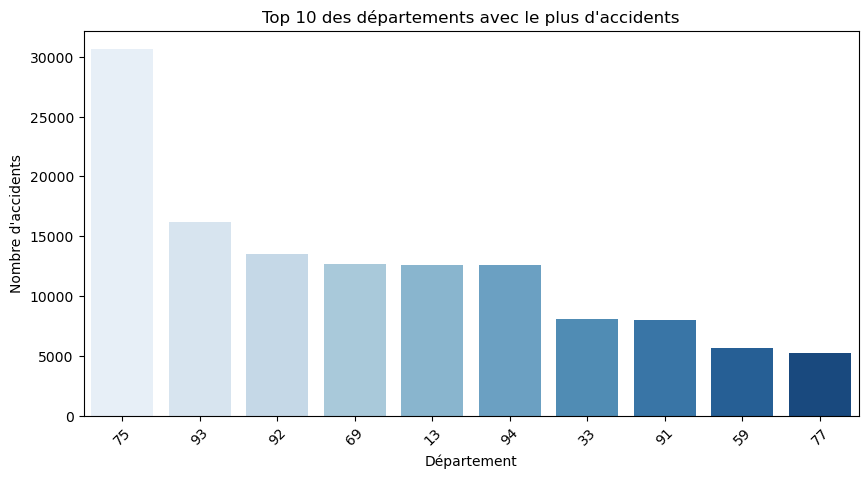

In [ ]:
accidents_par_departement = data["dep"].value_counts().head(10)  # Top 10 départements

# Visualisation
plt.figure(figsize=(10,5))
sns.barplot(x=accidents_par_departement.index, y=accidents_par_departement.values, palette="Blues")
plt.xlabel("Département")
plt.ylabel("Nombre d'accidents")
plt.title("Top 10 des départements avec le plus d'accidents")
plt.xticks(rotation=45)
plt.show()

/var/folders/l6/h7clp4vx5dd4pfgsnhs_l58h0000gn/T/ipykernel_87558/4231733541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["mois"], palette="Blues",legend = False)


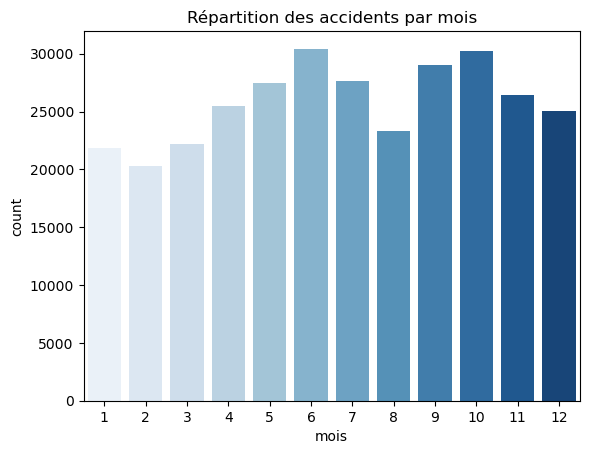

In [ ]:
# Nombre d'accidents par mois
sns.countplot(x=data["mois"], palette="Blues",legend = False)
plt.title("Répartition des accidents par mois")
plt.show()

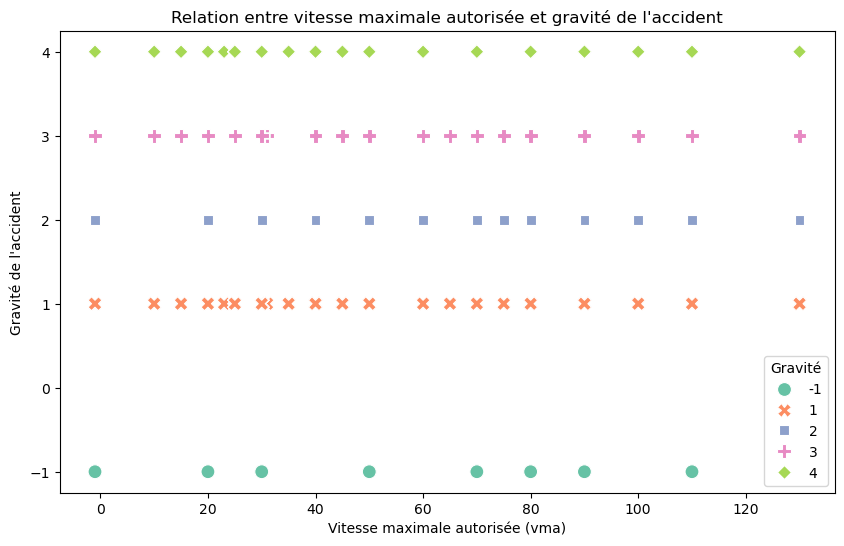

In [ ]:
# Nuage de points pour 'vma' et 'grav'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='vma', y='grav', hue='grav', palette='Set2', style='grav', s=100)
plt.title("Relation entre vitesse maximale autorisée et gravité de l'accident")
plt.xlabel("Vitesse maximale autorisée (vma)")
plt.ylabel("Gravité de l'accident")
plt.legend(title='Gravité')
plt.show()


In [ ]:
data["lat"] = data["lat"].str.replace(",", ".").astype(float)
data["long"] = data["long"].str.replace(",", ".").astype(float)

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Définir un point central pour la carte (ex : centre de la France)
centre_carte = [46.603354, 1.888334]

# Créer une carte centrée sur la France
m = folium.Map(location=centre_carte, zoom_start=6)

# Ajouter des marqueurs pour les accidents
marker_cluster = MarkerCluster().add_to(m)

# Limiter le nombre de points affichés pour éviter de surcharger la carte (ex : 1000 accidents max)
sample_data = data.sample(min(1000, len(data)))

for _, row in sample_data.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        popup=f"Gravité : {row['grav']}",
        icon=folium.Icon(color="red" if row["grav"] > 2 else "blue")  # Rouge = grave, Bleu = léger
    ).add_to(marker_cluster)

# Afficher la carte
m
